## MLDM Assessment


### **Data Preprocessing**

The Dataset for this classification problem is an Electronic Health Record Predicting dataset from a private Hospital which is situated in Indonesia.
The task embedded in and associated to this particular dataset is a classification prediction. 

The Dataset contains Patients' Laboratory results and would be used to determine if the patient's next care would be in care or out care.

The dataset contains eleven (11) columns, namely:

**HAEMATOCRIT** /Continuous /35.1 / Patient laboratory test result of haematocrit

**HAEMOGLOBINS**/Continuous/11.8 / Patient laboratory test result of haemoglobins

**ERYTHROCYTE**/Continuous/4.65 /  Patient laboratory test result of erythrocyte

**LEUCOCYTE**	/Continuous /6.3 / Patient laboratory test result of leucocyte

**THROMBOCYTE**/Continuous/310/ Patient laboratory test result of thrombocyte

**MCH**/Continuous /25.4/ Patient laboratory test result of MCH

**MCHC**/Continuous/33.6/ Patient laboratory test result of MCHC

**MCV**/Continuous /75.5/ Patient laboratory test result of MCV

**AGE**/Continuous/12/ Patient age

**SEX**/Nominal – Binary/F/ Patient gender

**SOURCE**/Nominal/ {in,out}/The class target in.= in care patient, out = out care patient

The last column(i.e., Source) is the class label which has a binary (two) value: "IN" or "OUT". 'In' means the patient gets to receive an 'inpatient' care while 'out' means the patient' next care treatment would be as an 'outpatient'. 



```
# Importing Libraries
```



A python Library is the collection of modules just like a book library is the collection of books. A module in python simply put is like a collection of codes saved with a .py extension. So, a collection of python modules make up a python library which we would be importing to use repeatedly; it's just to make my programming a little bit simpler and convenient. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
!pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/




```
# Loading my Dataset
```



In [3]:
cl_dt = pd.read_csv("data_ori.csv")

Inspecting and Exploring the Dataset






```
# Getting the dataframe' number of rows and 
columns
```



In [4]:
cl_dt.shape

(4412, 11)



```
# Obtaining a concise summary of the data frame
```



In [5]:
cl_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4412 entries, 0 to 4411
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HAEMATOCRIT   4412 non-null   float64
 1   HAEMOGLOBINS  4412 non-null   float64
 2   ERYTHROCYTE   4412 non-null   float64
 3   LEUCOCYTE     4412 non-null   float64
 4   THROMBOCYTE   4412 non-null   int64  
 5   MCH           4412 non-null   float64
 6   MCHC          4412 non-null   float64
 7   MCV           4412 non-null   float64
 8   AGE           4412 non-null   int64  
 9   SEX           4412 non-null   object 
 10  SOURCE        4412 non-null   object 
dtypes: float64(7), int64(2), object(2)
memory usage: 379.3+ KB


In [6]:
cl_dt.info

<bound method DataFrame.info of       HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE  LEUCOCYTE  THROMBOCYTE   MCH  \
0            35.1          11.8         4.65        6.3          310  25.4   
1            43.5          14.8         5.39       12.7          334  27.5   
2            33.5          11.3         4.74       13.2          305  23.8   
3            39.1          13.7         4.98       10.5          366  27.5   
4            30.9           9.9         4.23       22.1          333  23.4   
...           ...           ...          ...        ...          ...   ...   
4407         32.8          10.4         3.49        8.1           72  29.8   
4408         33.7          10.8         3.67        6.7           70  29.4   
4409         33.2          11.2         3.47        7.2          235  32.3   
4410         31.5          10.4         3.15        9.1          187  33.0   
4411         33.5          10.9         3.44        5.8          275  31.7   

      MCHC    MCV  AGE SEX SOUR



```
# Obtaining a statistical description of the cl_dt data frame.
```



In [7]:
cl_dt.describe().all

<bound method NDFrame._add_numeric_operations.<locals>.all of        HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE    LEUCOCYTE  THROMBOCYTE  \
count  4412.000000   4412.000000  4412.000000  4412.000000  4412.000000   
mean     38.197688     12.741727     4.541260     8.718608   257.524479   
std       5.974784      2.079903     0.784091     5.049041   113.972365   
min      13.700000      3.800000     1.480000     1.100000     8.000000   
25%      34.375000     11.400000     4.040000     5.675000   188.000000   
50%      38.600000     12.900000     4.570000     7.600000   256.000000   
75%      42.500000     14.200000     5.050000    10.300000   321.000000   
max      69.000000     18.900000     7.860000    76.600000  1183.000000   

               MCH         MCHC          MCV          AGE  
count  4412.000000  4412.000000  4412.000000  4412.000000  
mean     28.234701    33.343042    84.612942    46.626473  
std       2.672639     1.228664     6.859101    21.731218  
min      14.900000    

There a skewness in the mean, i.e., the data is not normally distributed around the mean. Simply, it measures rate of difference between a given distribution and a normally distributed one. A normally distributed mean should be symmetric.

Positive skewness is when the mean is greater than (>) the median and the mode; i.e., Mode < Median < Mean.

Negative skewness is when the mean is lesser than (<) the median and the mode; i.e., Mode > Median > Mean.

A symmetrical distribution or Zero (or nearly Zero (0)) is when the distribution is symmetric or just about almost symmetric round about the mean; i.e., estimatedly Mode = Median =Mean.

Ref: https://pyshark.com/skewness-in-python/



```
# Calculating the simple skewness
```



In [8]:
from scipy.stats import skew




```
# Using the dataframe.skew() function to find skewness over the row and column axis.

# Pandas dataframe.skew() function return unbiased skew over requested axis Normalized by N-1.

```



In [9]:
cl_dt.skew(axis =0)

<ipython-input-9-33cfd4ba6b06>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  cl_dt.skew(axis =0)


HAEMATOCRIT    -0.303819
HAEMOGLOBINS   -0.312439
ERYTHROCYTE    -0.007436
LEUCOCYTE       2.792556
THROMBOCYTE     0.845498
MCH            -1.170640
MCHC           -0.470792
MCV            -0.803890
AGE            -0.124524
dtype: float64



```
# Using the dataframe.skew() function to find skewness over the column axis.
```



In [10]:
skew_value=cl_dt.skew(axis =1)

<ipython-input-10-b38a6c89713c>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  skew_value=cl_dt.skew(axis =1)


In [11]:
print("Skew:")

print(skew_value)

Skew:
0       2.705389
1       2.713662
2       2.740828
3       2.773355
4       2.777155
          ...   
4407    0.625025
4408    0.609929
4409    1.949668
4410    1.436946
4411    2.132083
Length: 4412, dtype: float64


A skewness value of 0... in the output implies the presence of a symmetrical distribution of values.

A negatively skewed value in the output denotes an asymmetry in the distribution, and that the tail is larger towards the left hand side of the distribution.

The prevalent positive skewness in the output values suggests an asymmetry in the distribution and that the tail is larger towards the right hand side of the distribution.

Ref: https://tinyurl.com/2s3zf9fz



```
# Getting the number of elements
(4412 * 11)
```



In [12]:
cl_dt.size

48532



```
# Showing all elements using iloc:
however, the elements are many so,
it shows the first and last 5 rows;
equivalent to the head() and tail()
functions.

```



In [13]:
cl_dt.iloc[:,:]

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,35.1,11.8,4.65,6.3,310,25.4,33.6,75.5,1,F,out
1,43.5,14.8,5.39,12.7,334,27.5,34.0,80.7,1,F,out
2,33.5,11.3,4.74,13.2,305,23.8,33.7,70.7,1,F,out
3,39.1,13.7,4.98,10.5,366,27.5,35.0,78.5,1,F,out
4,30.9,9.9,4.23,22.1,333,23.4,32.0,73.0,1,M,out
...,...,...,...,...,...,...,...,...,...,...,...
4407,32.8,10.4,3.49,8.1,72,29.8,31.7,94.0,92,F,in
4408,33.7,10.8,3.67,6.7,70,29.4,32.0,91.8,92,F,in
4409,33.2,11.2,3.47,7.2,235,32.3,33.7,95.7,93,F,out
4410,31.5,10.4,3.15,9.1,187,33.0,33.0,100.0,98,F,in




```
# Showing the contents of the data frame by 
calling its (the dataset') name.
```



In [14]:
cl_dt

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,35.1,11.8,4.65,6.3,310,25.4,33.6,75.5,1,F,out
1,43.5,14.8,5.39,12.7,334,27.5,34.0,80.7,1,F,out
2,33.5,11.3,4.74,13.2,305,23.8,33.7,70.7,1,F,out
3,39.1,13.7,4.98,10.5,366,27.5,35.0,78.5,1,F,out
4,30.9,9.9,4.23,22.1,333,23.4,32.0,73.0,1,M,out
...,...,...,...,...,...,...,...,...,...,...,...
4407,32.8,10.4,3.49,8.1,72,29.8,31.7,94.0,92,F,in
4408,33.7,10.8,3.67,6.7,70,29.4,32.0,91.8,92,F,in
4409,33.2,11.2,3.47,7.2,235,32.3,33.7,95.7,93,F,out
4410,31.5,10.4,3.15,9.1,187,33.0,33.0,100.0,98,F,in




```
# Comparing the Patients that get to get inpatient care vs those that get to get outpatient care.
```



In [15]:
cl_dt["SOURCE"].value_counts

<bound method IndexOpsMixin.value_counts of 0       out
1       out
2       out
3       out
4       out
       ... 
4407     in
4408     in
4409    out
4410     in
4411    out
Name: SOURCE, Length: 4412, dtype: object>

In [16]:
cl_dt.iloc[:,10].value_counts()

out    2628
in     1784
Name: SOURCE, dtype: int64



```
# Counting each value in the "SEX" column
```



In [17]:
cl_dt.iloc[:,9].value_counts()

M    2290
F    2122
Name: SEX, dtype: int64



```
# Counting each value in the "AGE" column
```



In [18]:
cl_dt.iloc[:,8].value_counts()

25    92
62    85
66    85
67    84
45    84
      ..
85     6
90     6
93     1
98     1
99     1
Name: AGE, Length: 95, dtype: int64



```
# Checking for null values in the data frame.

```



In [19]:
cl_dt.iloc[:,:].isnull()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
4407,False,False,False,False,False,False,False,False,False,False,False
4408,False,False,False,False,False,False,False,False,False,False,False
4409,False,False,False,False,False,False,False,False,False,False,False
4410,False,False,False,False,False,False,False,False,False,False,False




```
# Checking for any null value at all in the 
data frame.
```



In [20]:
cl_dt.iloc[:,:].isnull().values.any()

False



```
# Returning the age column
```



In [21]:
cl_dt.AGE

0        1
1        1
2        1
3        1
4        1
        ..
4407    92
4408    92
4409    93
4410    98
4411    99
Name: AGE, Length: 4412, dtype: int64



```
# Calculating min, max, mode and mean value 
of Age column.
```



In [22]:
cl_dt["AGE"].min()

1

In [23]:
cl_dt["AGE"].max()

99

In [24]:
cl_dt["AGE"].mean()

46.626473254759745

In [25]:
cl_dt["AGE"].mode()

0    25
dtype: int64

In [26]:
cl_dt["AGE"].median()

47.0

Statistical Data exploration Using visualisation



```
# Using seaborn library to show statistical information about different columns of dataset
```



/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


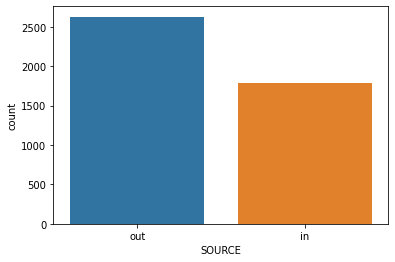

In [27]:
sns.countplot(cl_dt["SOURCE"])

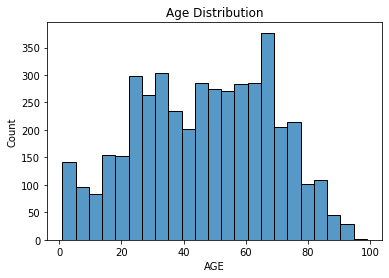

In [28]:
sns.histplot(cl_dt.AGE)
plt.title("Age Distribution")
plt.show
plt.savefig("Age Distribution.png")

From the Age Distribution columns, it's succintly obvious that the 60 - 70 years age group have the highest distribution (count) of the people coming into the hospital for medical checkups, with the peak distribution being about 380. This Distribution is supported by the value_counts() function which puts the highest count between the ages of 62 -67.

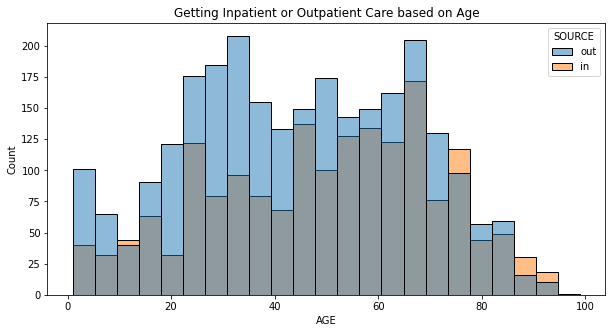

In [29]:
plt.figure(figsize=(10, 5))
plt.title("Getting Inpatient or Outpatient Care based on Age" )
sns.histplot(x="AGE", hue="SOURCE", data=cl_dt)
plt.show()

The visualisation shows that patients over the age of 80 and those in their late 70s are more likely to get inpatient care.



```
# Visualizing the multidimensional relationships among the samples
```



/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


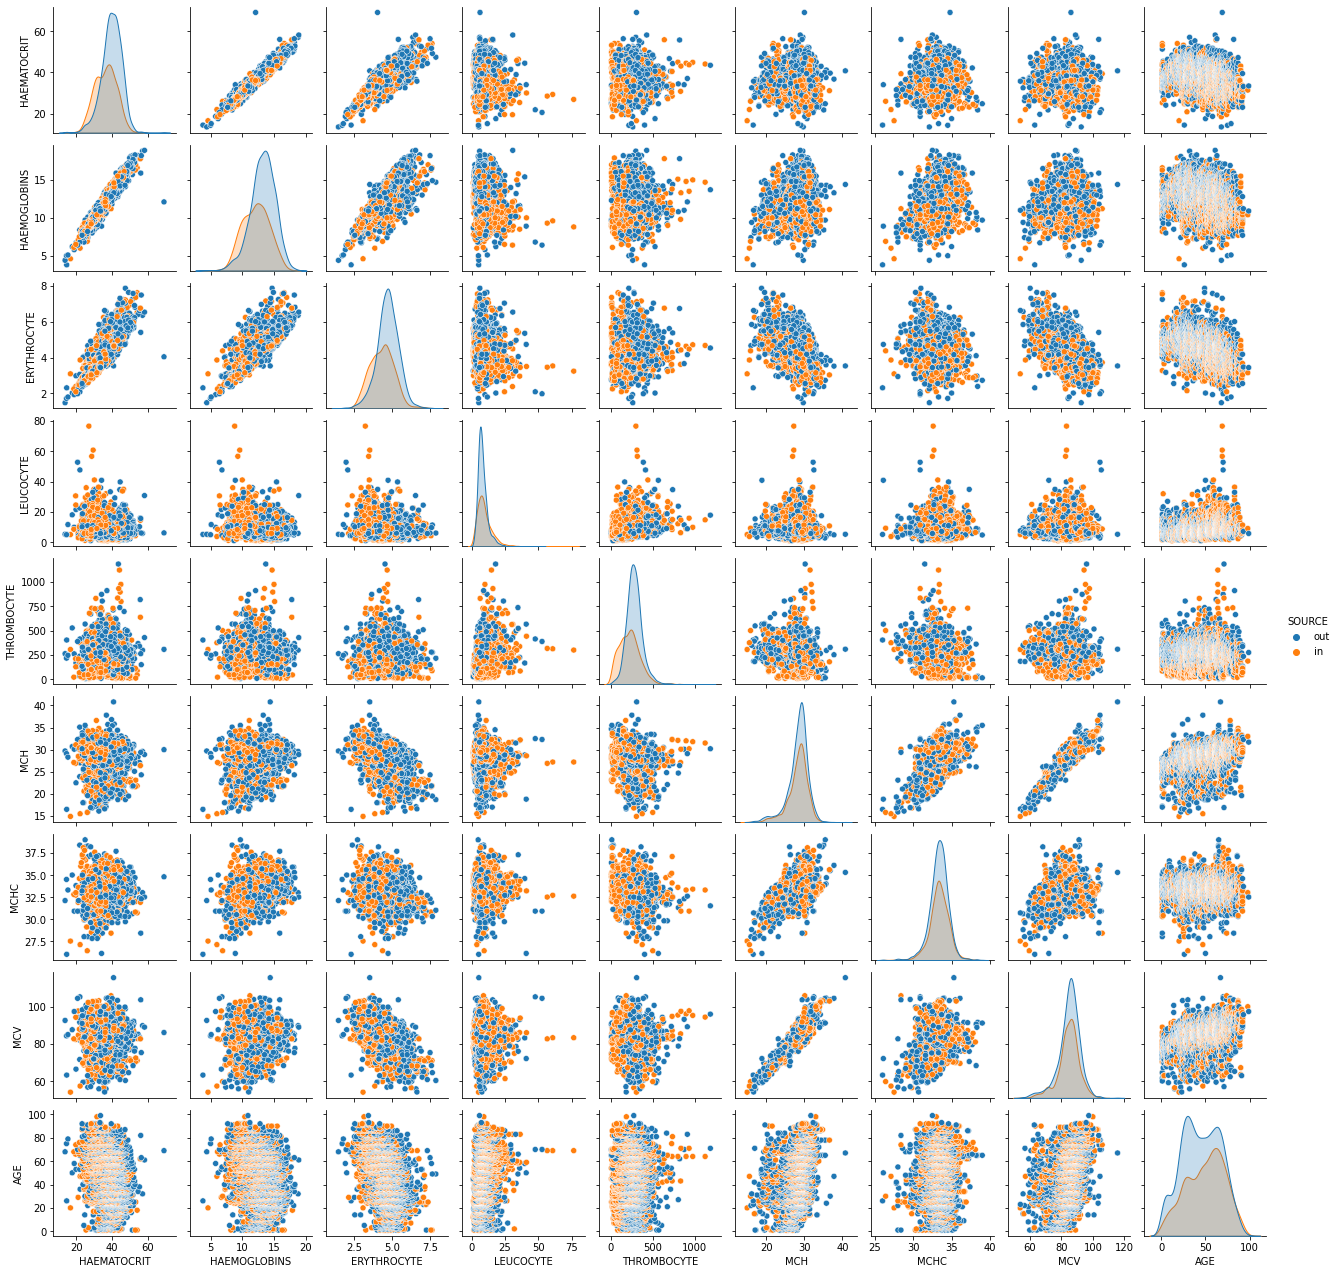

In [30]:
sns.pairplot(cl_dt, hue='SOURCE', size=2);

**Encoding the Categorical Variables**

In the cl_dt dataset, the "SOURCE" column a class target and the "SEX" column have categorical values; so before running the classification algorithms, the columns have to be converted into nemerical values.

In [31]:
cl_dt["SEX"]=cl_dt["SEX"].replace(["F","M"], [0,1])

In [32]:
cl_dt["SOURCE"]=cl_dt["SOURCE"].replace(["out","in"], [0,1])

In [33]:
cl_dt.head()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,35.1,11.8,4.65,6.3,310,25.4,33.6,75.5,1,0,0
1,43.5,14.8,5.39,12.7,334,27.5,34.0,80.7,1,0,0
2,33.5,11.3,4.74,13.2,305,23.8,33.7,70.7,1,0,0
3,39.1,13.7,4.98,10.5,366,27.5,35.0,78.5,1,0,0
4,30.9,9.9,4.23,22.1,333,23.4,32.0,73.0,1,1,0


The main aim here is to classify the Patients who have undergone checkups into whether they'd be receiving inpatient or outpatient care based on the critical testings they've undergone.



```
# Splitting the Dataset into Training Dataset and Test Dataset from Scikit Learn
```



In [49]:
X = cl_dt.drop("SOURCE",axis=1)
y = cl_dt["SOURCE"] 

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, stratify=y, random_state=99)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### **Building and Training the Neural Network**







In [35]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(8,activation="relu",input_shape=(10,)))
model.add(tf.keras.layers.Dense(2,activation="sigmoid"))

In [36]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics="accuracy")

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 88        
                                                                 
 dense_1 (Dense)             (None, 2)                 18        
                                                                 
Total params: 106
Trainable params: 106
Non-trainable params: 0
_________________________________________________________________


In [38]:
class_weights = {0:1, 1:6, 2:7} 

In [39]:
history = model.fit(X_train, y_train, \
                    batch_size = 8, epochs= 50, \
                    verbose=2, class_weight=class_weights, \
                    validation_split=0.2)

Epoch 1/50
353/353 - 1s - loss: 1.8987 - accuracy: 0.6064 - val_loss: 0.8085 - val_accuracy: 0.5609 - 1s/epoch - 4ms/step
Epoch 2/50
353/353 - 1s - loss: 1.3568 - accuracy: 0.4988 - val_loss: 0.8864 - val_accuracy: 0.4986 - 534ms/epoch - 2ms/step
Epoch 3/50
353/353 - 1s - loss: 1.3052 - accuracy: 0.4722 - val_loss: 0.8636 - val_accuracy: 0.5000 - 602ms/epoch - 2ms/step
Epoch 4/50
353/353 - 1s - loss: 1.2797 - accuracy: 0.4821 - val_loss: 0.8423 - val_accuracy: 0.5057 - 589ms/epoch - 2ms/step
Epoch 5/50
353/353 - 1s - loss: 1.2656 - accuracy: 0.4864 - val_loss: 0.8450 - val_accuracy: 0.5113 - 587ms/epoch - 2ms/step
Epoch 6/50
353/353 - 1s - loss: 1.2567 - accuracy: 0.4927 - val_loss: 0.8558 - val_accuracy: 0.4972 - 571ms/epoch - 2ms/step
Epoch 7/50
353/353 - 1s - loss: 1.2509 - accuracy: 0.4931 - val_loss: 0.8371 - val_accuracy: 0.5028 - 590ms/epoch - 2ms/step
Epoch 8/50
353/353 - 1s - loss: 1.2442 - accuracy: 0.4956 - val_loss: 0.8410 - val_accuracy: 0.5071 - 540ms/epoch - 2ms/step
Epo

### **Evaluating Our Neural Network**

In [40]:
accuracy = history.history["accuracy"]
validation_accuracy = history.history["val_accuracy"]


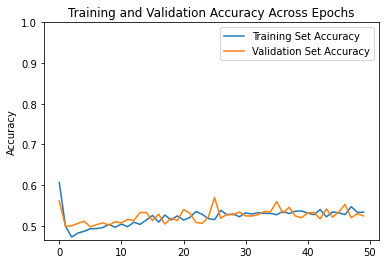

In [41]:
plt.plot(accuracy,label="Training Set Accuracy")
plt.plot(validation_accuracy,label="Validation Set Accuracy")
plt.ylabel("Accuracy")
plt.ylim([min(plt.ylim()),1])
plt.title("Training and Validation Accuracy Across Epochs")
plt.legend()

In [42]:
loss = history.history["loss"]
validation_loss = history.history["val_loss"]

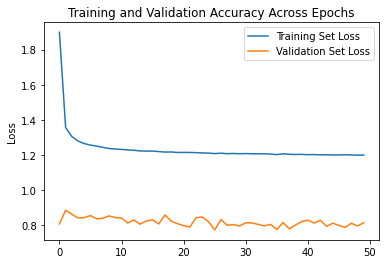

In [43]:
plt.plot(loss,label="Training Set Loss")
plt.plot(validation_loss,label="Validation Set Loss")
plt.ylabel("Loss")
plt.title("Training and Validation Accuracy Across Epochs")
plt.legend()

In [44]:
from sklearn.metrics import confusion_matrix,classification_report

In [45]:
y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis=1)

28/28 [==============================] - 0s 1ms/step


In [46]:
confusion_matrix = confusion_matrix(y_test,y_pred)

Text(0.5, 1.0, 'Confusion Matrix')

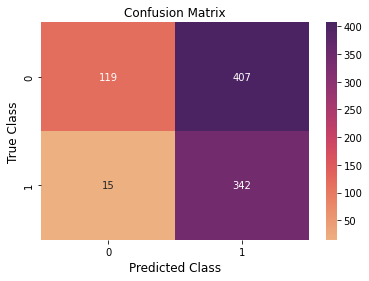

In [50]:
ax = sns.heatmap(confusion_matrix,cmap="flare",annot=True,fmt="d")

plt.xlabel("Predicted Class",fontsize=12)
plt.ylabel("True Class",fontsize=12)
plt.title("Confusion Matrix",fontsize=12)


In [48]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.23      0.36       526
           1       0.46      0.96      0.62       357

    accuracy                           0.52       883
   macro avg       0.67      0.59      0.49       883
weighted avg       0.71      0.52      0.46       883

